# Making Estimations with our NBA dataset

While in the [Building the dataset](https://github.com/agusle/nba-players-predictions/blob/main/nba-players-dataset.ipynb) notebook, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn.

The goals of this notebook are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Training and using predictive models: Univariable and Multivariate Linear Regression, Classification
- Understand how Gradient Descent works by implementing a Linear Regressor in python

## Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- **Years in the league:** NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- **Age:** Highly correlated to the previous one, NBA players have a minimun age of 19 years
- **Draft position:** players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- **Performance in statistical categories:** after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- **Team:** Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- **Year in which the contract was signed:** the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- **Intangibles:** players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

### Analyzing our data

In [53]:
import pandas as pd
import warnings
data = pd.read_csv("https://raw.githubusercontent.com/agusle/nba-players-predictions/main/data/dataset/nba_players_processed_dataset.csv")

#ignore warnings
warnings.filterwarnings("ignore")
#make a copy 
data1= data.copy()
#dropping 'TEAM_NAME' to  according Q&A 29.04 (22 players with no team but salary) 
data1.dropna(subset=["PTS",'TEAM_NAME'], inplace=True)

Let's have another look at our previously generated dataset. 

In [54]:
data

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,134.0,18.4,7.2,5.1,0.8,0.4,0.5,2022-10-02,2840160,"22 years, 11 months, 12 days"
1,203500,Steven Adams,Grizzlies,Center,210,120,New Zealand,1993-07-20,9,12,664.0,26.8,9.3,8.0,1.5,0.9,0.9,2022-10-01,17926829,"29 years, 1 months, 11 days"
2,1628389,Bam Adebayo,Heat,Center,205,115,USA,1997-07-18,5,14,343.0,28.2,13.5,8.3,3.5,1.0,0.9,2022-10-04,30351780,"25 years, 1 months, 13 days"
3,1630583,Santi Aldama,Grizzlies,Forward,210,97,Spain,2001-01-10,1,30,32.0,11.2,4.1,2.7,0.7,0.2,0.3,2022-10-01,2094120,"21 years, 7 months, 21 days"
4,1629638,Nickeil Alexander-Walker,Jazz,Guard,195,92,Canada,1998-09-02,3,17,158.0,19.4,9.3,2.6,2.2,0.7,0.3,2022-10-02,5009633,"23 years, 11 months, 29 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1630593,McKinley Wright IV,Mavericks,Guard,180,87,USA,1998-10-25,1,0,5.0,3.8,1.0,0.0,0.6,0.0,0.0,2022-10-05,1637966,"23 years, 10 months, 6 days"
399,201152,Thaddeus Young,Raptors,Forward,203,106,USA,1988-06-21,15,12,1085.0,29.3,12.8,5.8,1.8,1.4,0.4,2022-10-02,8000000,"34 years, 2 months, 10 days"
400,1629027,Trae Young,Hawks,Guard,185,74,USA,1998-09-19,4,5,280.0,33.6,25.3,3.9,9.1,0.9,0.2,2022-10-06,37096500,"23 years, 11 months, 12 days"
401,1630209,Omer Yurtseven,Heat,Center,210,124,Turkey,1998-06-19,1,0,56.0,12.6,5.3,5.3,0.9,0.3,0.4,2022-10-04,1752638,"24 years, 2 months, 12 days"


1.1. Plot all players statistics ("PTS", "REB", "AST","STL","BLK") against salary

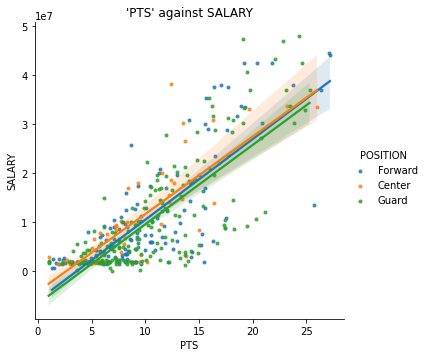

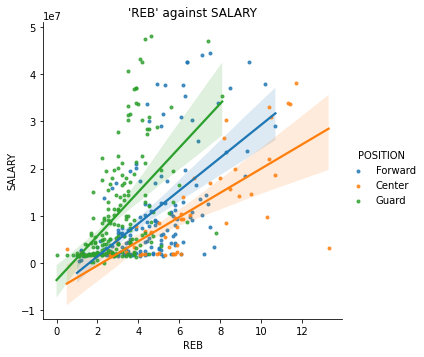

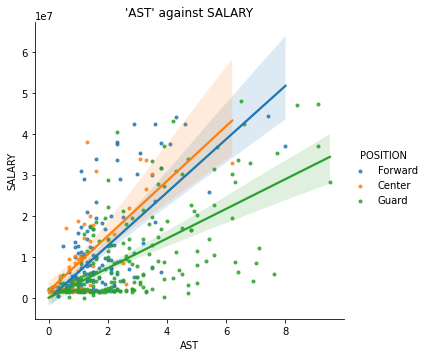

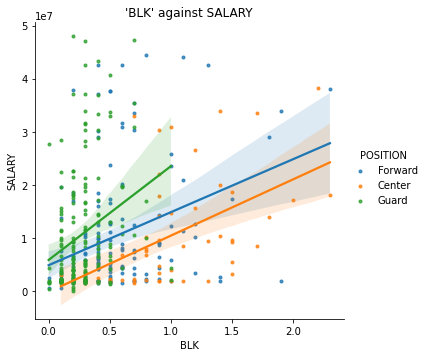

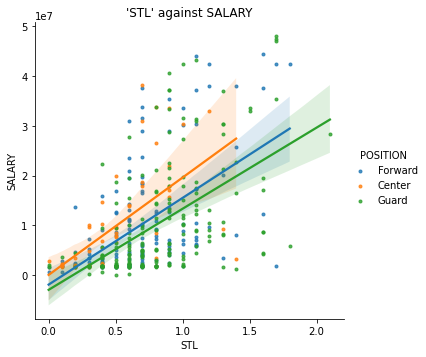

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=data1,x="PTS", y="SALARY", markers=".",hue='POSITION')
ax = plt.gca()
ax.set_title("'PTS' against SALARY")
sns.lmplot(data=data1,x="REB", y="SALARY", markers=".",hue='POSITION')
ax = plt.gca()
ax.set_title("'REB' against SALARY")
sns.lmplot(data=data1,x="AST", y="SALARY", markers=".",hue='POSITION')
ax = plt.gca()
ax.set_title("'AST' against SALARY")
sns.lmplot(data=data1,x="BLK", y="SALARY", markers=".",hue='POSITION')
ax = plt.gca()
ax.set_title("'BLK' against SALARY")
sns.lmplot(data=data1,x="STL", y="SALARY", markers=".",hue='POSITION')
ax = plt.gca()
ax.set_title("'STL' against SALARY")
plt.show()


1.2. What can we say about these distributions?

In [ ]:
text= (
  f' These distributions indicate that, in general, the strongest relationship\n among players stats and salary are "PTS".'
  f' Also, we can notice that if we split the\n distributions by position we can deepen into the analysis of the other stats.\n'
  f' We can conclude that the rest of statistics are related to a greater\n or lesser salary according to the playe position.'
  f' In the following table we can conclude:'
)
  
  
table =  """
  GENERAL
  1 - PTS
  2 - AST - REB
  3 - BLK - STL
  
  GUARD
  1 - PTS
  2 - AST - STL
  3 - BLK - REB
  
  FORWARD
  1 - PTS
  2 - AST - REB
  3 - BLK - STL
  
  CENTER
  1 - PTS
  2 - BLK - REB 
  3 - AST - STL
"""

print(text)
print(table)

 These distributions indicate that, in general, the strongest relationship
 among players stats and salary are "PTS". Also, we can notice that if we split the
 distributions by position we can deepen into the analysis of the other stats.
 We can conclude that the rest of statistics are related to a greater
 or lesser salary according to the playe position. In the following table we can conclude:

  GENERAL
  1 - PTS
  2 - AST - REB
  3 - BLK - STL
  
  GUARD
  1 - PTS
  2 - AST - STL
  3 - BLK - REB
  
  FORWARD
  1 - PTS
  2 - AST - REB
  3 - BLK - STL
  
  CENTER
  1 - PTS
  2 - BLK - REB 
  3 - AST - STL



### Splitting the Dataset

1.3. Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting. Make sure to set the random state for reproducibility.

In [7]:
from sklearn.model_selection import train_test_split

#split the dataset in 66/33 train and test
x_train, x_test, y_train, y_test = train_test_split(data1,data1['SALARY'],test_size=0.33,random_state=42)
print(f"x_train shape = {x_train.shape}, x_test shape = {x_test.shape}")
print(f"y_train shape = {y_train.shape}, y_test shape = {y_test.shape}")

x_train shape = (269, 20), x_test shape = (133, 20)
y_train shape = (269,), y_test shape = (133,)


### Baseline Model and Evaluation Metric

In every project, we need a baseline model that implements a very simple algorithm or heuristic so we can compare our results with it. 
In this case, we could create a function that always returns the average player salary, evaluate that, and then compare the result with our modeling to see if we are improving. 

We need an evaluation metric to see how well our models fit the data. For this project we will use [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) as our regression evaluation metric, because it is a really simple metric to interpret. A lower value means the model performs better. 

For this particular problem, we will always round the value, as we don't need decimals for this task.

1.4. Create a Baseline model class that implements  fit() and predict() methods. As this model will not consider any other variable, the fit method should only receive a list of all players salaries. The predict method should receive and iterable and return a numpy array with the same length but every element should have the same value (the average salary)

In [10]:
import numpy as np

In [8]:
class BaselineModel():
    """A baseline model that always returns the same value, the mean of the players salary in the train data"""
    
    def fit(self, y_train):
        """
        Fit the training data. 
        
        Parameters
        ----------
        y_train: Union[pd.Series, np.ndarray]
            a pandas series or numpy array containing salary information
        """
        self.mean = np.mean(y_train)
    
    def predict(self, X):
        """
        Predict salaries 
        
        Parameters
        ----------
        X: Union[pd.DataFrame, pd.Series, np.ndarray]
            a pandas series, dataframe or numpy array with the 
            
        Returns
        -------
        np.ndarray
            a numpy array of the same length as X, with all elements equal to the mean salary calculated in fit()
        """
        predict = [self.mean]* len(X.index)
        predict = np.array(predict)
        return predict

1.5. Evaluate the performance of our BaselineModel on the test set using mean_absolute_error from Sklearn (round the result)

In [11]:
from sklearn.metrics import mean_absolute_error

#calculate baseline model prediction
base = BaselineModel()
BaselineModel.fit(base,y_train)
y_pred_base = BaselineModel.predict(base,y_test)

#evaluate model's performance
baseline_mae = mean_absolute_error(y_test,y_pred_base).round(0)
print(f'Mean absolute error of players salaries with baseline model: +/- U$S {baseline_mae:,}')

Mean absolute error of players salaries with baseline model: +/- U$S 9,058,478.0


### Regression with a single variable

You're now going to start modeling data. We will start with a really simple approach, selecting just one variable, and doing a regression to see if we improve upon our baseline.


1.6. Select the variable you think would provide the best fit. Perform feature scaling on this variable using a Sklearn scaler.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#select PTS as the variable that would provide the best fit and scale it in test and transform
x_train_scaled = scaler.fit_transform(x_train[['PTS']])
x_test_scaled = scaler.transform(x_test[['PTS']])

1.7. Train a model with [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) from Sklearn using the default parameters. Evaluate the model's performance on the test set using the selected metric.

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#declare SGD Regressor with default hyperparameters
sgdr = SGDRegressor(random_state=42)  

#fit the model on train data and predict on test
sgdr.fit(x_train_scaled, y_train)
y_pred_sgdr = sgdr.predict(x_test_scaled)

#evaluate model's performance
sgdr_default_mae = mean_absolute_error(y_test,y_pred_sgdr).round(0)
print(f'Mean absolute error of players salaries with SGDRegressor model with default parameters : +/- U$S {sgdr_default_mae:,}')

Mean absolute error of players salaries with SGDRegressor model with default parameters : +/- U$S 5,458,070.0


1.8. Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set, then save the results of each hyperparameter combination, finally select the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

In [14]:
def search_best_hyperparameters_SGDRS(max_iter, eta_0):
    result = {
        "hyperparameters": {"max_iter": None, "eta_0": None}, 
        "mae": None,
        "y_pred": None
    }
    for mi in max_iter:
      for et in eta_0:
        #define the regressor model by using the SGDRegressor class (SGD) 
        sgdr = SGDRegressor(max_iter=mi, eta0=et,random_state=42)
        #fit the model on train data and check the model accuracy score
        sgdr.fit(x_train_scaled, y_train)
        #predicting and accuracy check
        y_pred_sgdr_best = sgdr.predict(x_test_scaled)
        mae_best = mean_absolute_error(y_test,y_pred_sgdr_best).round(0)
        if result['mae'] == None:
          result['hyperparameters']['max_iter']=mi
          result['hyperparameters']['eta_0']=et
          result['mae']= mae_best
          result['y_pred']= y_pred_sgdr_best
        elif result['mae'] > mae_best:
          result['hyperparameters']['max_iter']=mi
          result['hyperparameters']['eta_0']=et
          result['mae']= mae_best
          result['y_pred']= y_pred_sgdr_best
    return result

In [15]:
# Example list of hyperparameters values
max_iter = [100,1000, 10000,100000,1000000,10000000]
eta_0 = [0.00001,0.0001, 0.001, 0.01, 0.1,1]

result = search_best_hyperparameters_SGDRS(max_iter, eta_0)
print(result['hyperparameters'],result['mae'])

{'max_iter': 100, 'eta_0': 0.1} 5457009.0


1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [16]:
print("Mean Absolute Error for each model:\n")
print(f"Baseline: +/- U$S {baseline_mae:,}")
print(f"Default SGDRegressor: +/- U$S {sgdr_default_mae:,}")
print(f"Best SGDRegressor: US$ +/- {result['mae']:,} with 'Max_iter': {result['hyperparameters']['max_iter']:,} and 'eta_0': {result['hyperparameters']['eta_0']:,} ")

Mean Absolute Error for each model:

Baseline: +/- U$S 9,058,478.0
Default SGDRegressor: +/- U$S 5,458,070.0
Best SGDRegressor: US$ +/- 5,457,009.0 with 'Max_iter': 100 and 'eta_0': 0.1 


### Multivariate Linear Regression

To improve our model, we will add more features to it. We will have to do some processing to our dataset to be able to use the data.
We'll start with the following variables:

- Points
- Rebounds
- Assists
- Blocks
- Experience
- Position
- Draft Number


1.10. Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index):

["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "TEAM_NAME", "SALARY"]

In [17]:
#create a copy, fit columns, rename and assign index
data2= data1.copy()
data2= data2[["PLAYER_ID","TEAM_NAME","POSITION","SEASON_EXP","DRAFT_NUMBER","PTS", "REB", "AST", "BLK","SALARY"]]
data2= data2.set_index("PLAYER_ID")
data2.head()


,TEAM_NAME,POSITION,SEASON_EXP,DRAFT_NUMBER,PTS,REB,AST,BLK,SALARY
PLAYER_ID,,,,,,,,,
1630173,Raptors,Forward,2,20,7.2,5.1,0.8,0.5,2840160
203500,Grizzlies,Center,9,12,9.3,8.0,1.5,0.9,17926829
1628389,Heat,Center,5,14,13.5,8.3,3.5,0.9,30351780
1630583,Grizzlies,Forward,1,30,4.1,2.7,0.7,0.3,2094120
1629638,Jazz,Guard,3,17,9.3,2.6,2.2,0.3,5009633


#### Feature Engineering

1.11. Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years, but second round players and undrafted players don't have guaranteed contracts. So we're gonna divide the bins like this: 

       - 1 to 15: firstround_lottery
       - 15 to 30: firstround_non_lottery
       - 30 to 60: second_round
       - Undrafted: undrafted
       
Create a new column named DRAFT using these 4 categories. Drop the draft number column.

In [18]:
#assign  0 (zero) to NaN values and 'Undrafted'
data2['DRAFT_NUMBER']= data2['DRAFT_NUMBER'].fillna(0)
data2['DRAFT_NUMBER']= data2['DRAFT_NUMBER'].replace("Undrafted", 0).astype(np.int64)

#binning DRAFT_NUMBER and creating a new column DRAFT with values
draft_bins = [-1,0,15,30,60]
draft_labels =["undrafted","firstround_lottery","firstround_non_lottery","second_round"]
data2['DRAFT'] = pd.cut(data2['DRAFT_NUMBER'],bins=draft_bins,labels=draft_labels,include_lowest=True)

#drop draft number column
data2 = data2.drop(columns='DRAFT_NUMBER')

print(data2['DRAFT'].value_counts())


firstround_lottery        146
firstround_non_lottery     95
second_round               87
undrafted                  74
Name: DRAFT, dtype: int64


1.12. Encode the categorical features: DRAFT, POSITION and TEAM_NAME

In [19]:
data2 = pd.get_dummies(data2, columns=['DRAFT','POSITION','TEAM_NAME'],drop_first=True,prefix=['DRAFT:','POSITION:','TEAM:'])
data2.head()

,SEASON_EXP,PTS,REB,AST,BLK,SALARY,DRAFT:_firstround_lottery,DRAFT:_firstround_non_lottery,DRAFT:_second_round,POSITION:_Forward,...,TEAM:_Pistons,TEAM:_Raptors,TEAM:_Rockets,TEAM:_Spurs,TEAM:_Suns,TEAM:_Thunder,TEAM:_Timberwolves,TEAM:_Trail Blazers,TEAM:_Warriors,TEAM:_Wizards
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
1630173,2,7.2,5.1,0.8,0.5,2840160,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
203500,9,9.3,8.0,1.5,0.9,17926829,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1628389,5,13.5,8.3,3.5,0.9,30351780,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1630583,1,4.1,2.7,0.7,0.3,2094120,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1629638,3,9.3,2.6,2.2,0.3,5009633,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Modeling

1.13. Split the dataset into train and test

In [21]:
#split the dataset in 66/33 train and test with same random_state
data2_x_train, data2_x_test, data2_y_train, data2_y_test = train_test_split(data2,data2['SALARY'],test_size=0.33,random_state=42)

#dropping unnecesary columns in train data
data2_x_train.drop(columns='SALARY',inplace=True)
data2_x_test.drop(columns='SALARY',inplace=True)

print(f"data2_x_train shape = {data2_x_train.shape}, data2_x_test shape = {data2_x_test.shape}")
print(f"data2_y_train shape = {data2_y_train.shape}, data2_y_test shape = {data2_y_test.shape}")

data2_x_train shape = (269, 39), data2_x_test shape = (133, 39)
data2_y_train shape = (269,), data2_y_test shape = (133,)


1.14. Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = ['PTS','REB','AST','BLK','SEASON_EXP']

for feature in features:
    data2_x_train[feature] = scaler.fit_transform(data2_x_train[[feature]])
    data2_x_test[feature]= scaler.transform(data2_x_test[[feature]])

1.15. Write a function to train a SGDRegressor model with the new dataset, trying different hyperparameters, and selecting the one that performs the best.

In [23]:
def search_best_hyperparameters_SGDRM(max_iter, eta_0,alpha):
    result = {
        "hyperparameters": {"max_iter": None, "eta_0": None , "alpha": None}, 
        "mae": None,
        "y_pred": None
    }
    for mi in max_iter:
      for et in eta_0:
        for al in alpha:
          #define the regressor model by using the SGDRegressor class (SGD) 
          sgdr = SGDRegressor(max_iter=mi, eta0=et,alpha=al,random_state=42)
          #fit the model on train data and check the model accuracy score
          sgdr.fit(data2_x_train, data2_y_train)
          #predicting and accuracy check
          y_pred_multi = sgdr.predict(data2_x_test)
          mae_best_multi = mean_absolute_error(data2_y_test,y_pred_multi).round(0)
          if result['mae'] == None:
            result['hyperparameters']['max_iter']=mi
            result['hyperparameters']['eta_0']=et
            result['hyperparameters']['alpha']=al
            result['mae']= mae_best_multi
            result['y_pred']= y_pred_multi
          elif result['mae'] > mae_best_multi:
            result['hyperparameters']['max_iter']=mi
            result['hyperparameters']['eta_0']=et
            result['hyperparameters']['alpha']=al
            result['mae']= mae_best_multi
            result['y_pred']= y_pred_multi
    return result

In [24]:
max_iter = [1000,1500,2000,2400,2450,2480,3000]
eta_0 = [0.1,0.05,0.01,0.005]
alpha = [0.0001,0.001,0.01,0.05,0.1,1,2]

mae_best_multi = search_best_hyperparameters_SGDRM(max_iter, eta_0,alpha)
print(mae_best_multi['hyperparameters'],mae_best_multi['mae'])

{'max_iter': 1000, 'eta_0': 0.05, 'alpha': 0.1} 5300394.0


1.16. How did the model performed compared to our univariate models? 

In [25]:
print("Mean Absolute Error for each model:\n")
print(f"Baseline: +/- U$S {baseline_mae:,}")
print(f"Default SGDRegressor: +/- U$S {sgdr_default_mae:,}")
print(f"Best SGDRegressor: +/- U$S {result['mae']:,} with 'Max_iter': {result['hyperparameters']['max_iter']:,} and 'eta_0': {result['hyperparameters']['eta_0']:,} ")
print(f"Best SGDRegressor_Multi-Feature: +/- U$S {mae_best_multi['mae']:,} with 'Max_iter': {mae_best_multi['hyperparameters']['max_iter']:,},'eta_0': {mae_best_multi['hyperparameters']['eta_0']:,} and 'alpha': {mae_best_multi['hyperparameters']['alpha']:,} ")

Mean Absolute Error for each model:

Baseline: +/- U$S 9,058,478.0
Default SGDRegressor: +/- U$S 5,458,070.0
Best SGDRegressor: +/- U$S 5,457,009.0 with 'Max_iter': 100 and 'eta_0': 0.1 
Best SGDRegressor_Multi-Feature: +/- U$S 5,300,394.0 with 'Max_iter': 1,000,'eta_0': 0.05 and 'alpha': 0.1 


### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



1.17. Create new model using [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) from scikit learn. We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. Read the documentation to get a better grasp of what each one does.

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor

In [27]:
def search_best_hyperparameters_DTR(max_depth, min_samples_leaf,max_features):
    result = {
        "hyperparameters": {"max_depth": None, 
                            "min_samples_leaf": None , 
                            "max_features": None}, 
        "mae": None,
        "y_pred": None
    }
    for md in max_depth: 
      for ml in min_samples_leaf:
        for mf in max_features:
          dtr = DecisionTreeRegressor(max_depth=md, min_samples_leaf=ml,max_features=mf,random_state=42)
          #fit the model on train data and check the model accuracy score
          dtr.fit(data2_x_train, data2_y_train)
          #predicting and accuracy check
          y_pred_dtr = dtr.predict(data2_x_test)
          mae_best = mean_absolute_error(data2_y_test,y_pred_dtr).round(0)
          if result['mae'] == None:
            result['hyperparameters']['max_depth']=md
            result['hyperparameters']['min_samples_leaf']=ml
            result['hyperparameters']['max_features']=mf
            result['mae']= mae_best
            result['y_pred']= y_pred_dtr
          elif result['mae'] > mae_best:
            result['hyperparameters']['max_depth']=md
            result['hyperparameters']['min_samples_leaf']=ml
            result['hyperparameters']['max_features']=mf
            result['mae']= mae_best
            result['y_pred']= y_pred_dtr
    return result

In [28]:
max_depth = [2,5,7,10, 15, 20, 50]
min_samples_leaf = [2, 10,12,15,20,25,30, 50]
max_features = [1,2,10,20,30]

mae_best_dtr_multi = search_best_hyperparameters_DTR(max_depth, min_samples_leaf,max_features)
print(mae_best_dtr_multi['hyperparameters'],mae_best_dtr_multi['mae'])

{'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 20} 3838856.0


1.18. Compare the results obtained with the best decision tree model against the baseline, default and the best params sgd regressors-

In [29]:
print("Mean Absolute Error for each model:\n")
print(f"Baseline: +/- U$S {baseline_mae:,}")
print(f"Default SGDRegressor: +/- U$S {sgdr_default_mae:,}")
print(f"Best SGDRegressor: +/- U$S {result['mae']:,} with 'Max_iter': {result['hyperparameters']['max_iter']:,} and 'eta_0': {result['hyperparameters']['eta_0']:,} ")
print(f"Best SGDRegressor_Multi-Feature: +/- U$S {mae_best_multi['mae']:,} with 'Max_iter': {mae_best_multi['hyperparameters']['max_iter']:,},'eta_0': {mae_best_multi['hyperparameters']['eta_0']:,} and 'alpha': {mae_best_multi['hyperparameters']['alpha']:,} ")
print(f"Best DTR_Multi-Feature: +/- U$S {mae_best_dtr_multi['mae']:,} with 'Max_depth': {mae_best_dtr_multi['hyperparameters']['max_depth']:,},'min_samples_leaf': {mae_best_dtr_multi['hyperparameters']['min_samples_leaf']:,} and 'max_features': {mae_best_dtr_multi['hyperparameters']['max_features']:,} ")

Mean Absolute Error for each model:

Baseline: +/- U$S 9,058,478.0
Default SGDRegressor: +/- U$S 5,458,070.0
Best SGDRegressor: +/- U$S 5,457,009.0 with 'Max_iter': 100 and 'eta_0': 0.1 
Best SGDRegressor_Multi-Feature: +/- U$S 5,300,394.0 with 'Max_iter': 1,000,'eta_0': 0.05 and 'alpha': 0.1 
Best DTR_Multi-Feature: +/- U$S 3,838,856.0 with 'Max_depth': 15,'min_samples_leaf': 2 and 'max_features': 20 


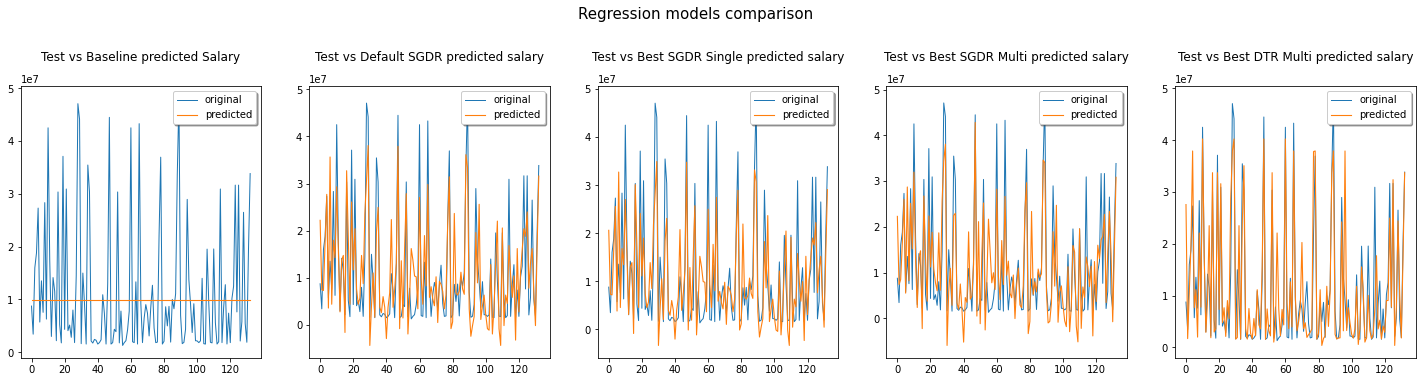

In [30]:
#create subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(25,5))
fig.suptitle('Regression models comparison',fontsize= 15,y=1.1)

#plot test vs baseline model
x_ax = range(len(y_test))
ax1.plot(x_ax, y_test, linewidth=1, label="original")
ax1.plot(x_ax,  y_pred_base, linewidth=1.1, label="predicted")
ax1.set_title("Test vs Baseline predicted Salary",pad=25)
ax1.legend(loc='best',fancybox=True, shadow=True)
 
#plot test vs SGDR default model
ax2.plot(x_ax, y_test, linewidth=1, label="original")
ax2.plot(x_ax,  y_pred_sgdr, linewidth=1.1, label="predicted")
ax2.set_title("Test vs Default SGDR predicted salary",pad=25)
ax2.legend(loc='best',fancybox=True, shadow=True)

#plot test vs Best SGDR model
ax3.plot(x_ax, y_test, linewidth=1, label="original")
ax3.plot(x_ax,  result['y_pred'], linewidth=1.1, label="predicted")
ax3.set_title("Test vs Best SGDR Single predicted salary",pad=25)
ax3.legend(loc='best',fancybox=True, shadow=True)

#plot test vs Best SGDR Multi model
ax4.plot(x_ax, y_test, linewidth=1, label="original")
ax4.plot(x_ax,  mae_best_multi['y_pred'], linewidth=1.1, label="predicted")
ax4.set_title("Test vs Best SGDR Multi predicted salary",pad=25)
ax4.legend(loc='best',fancybox=True, shadow=True)

#plot test vs Best DTR Multi model
ax5.plot(x_ax, y_test, linewidth=1, label="original")
ax5.plot(x_ax,  mae_best_dtr_multi['y_pred'], linewidth=1.1, label="predicted")
ax5.set_title("Test vs Best DTR Multi predicted salary",pad=25)
ax5.legend(loc='best',fancybox=True, shadow=True)
plt.show()

### Analyzing our results

Based on what you found, and what you read about players salaries above, answer the following: 

1.19. Which kind of model worked better in this dataset, linear or non linear models? Do you have any hypothesis about why? 

In [31]:
print(
    f'Decision Tree Regressor was the model who worked better in this dataset to\n'
    f'predict the dependent variable so I can conclude that non linear models fit the best.\n'
    f'The nonlinear model provides a better fit because it is both unbiased and produces\n'
    f'smaller residuals.'
    )

Decision Tree Regressor was the model who worked better in this dataset to
predict the dependent variable so I can conclude that non linear models fit the best.
The nonlinear model provides a better fit because it is both unbiased and produces
smaller residuals.


## Star or no Star? Predicting players All-NBA selections

In this section we're going to try to solve a different question:

Can we train a model to predict which players are going to be selected to ALL-NBA teams at the end of the season? This is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) task, so we're training our first classifier model to solve this problem.

Consider that:

- Being selected as part of the [All-NBA teams](https://en.wikipedia.org/wiki/All-NBA_Team) is different than being selected for [All-Star Game](https://en.wikipedia.org/wiki/NBA_All-Star_Game). 
- You're trying to predict All-NBA selections, which takes place after the regular season but before playoffs start, so we're only going to use players and teams statistics about the regular season (you're not going to consider if the players got to the NBA finals for example). 
- All Star game takes place at the middle point of the regular season, players are selected based on partial season performance, and the general public has 50% of the votes, so it is also a more popularity-based award.
- All-NBA teams are divided in first, second and third teams of 5 players each, divided by position: 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
- As only 15 players are selected to All-NBA teams each year (out of more than 400 qualifying players), our dataset is going to be imbalanced. You're going to have to find a good strategy to deal with this inbalance.

### Analyzing the data

To do this task, you're going to need historical information about All-NBA selections. We'll use a dataset that contains information about players from season starting in 1990 and ending in the 2018-2019 season.
The dataset contains statistics for all players, and a column named "all-nba" that is going to be our target variable, 1 means the player was selected to an All-NBA team that season.


2.1. Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:
- number of rows
- number of seasons
- number of unique players
- number of all-nba selections vs non selected 

In [32]:
import pandas as pd
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)

### Splitting the dataset

2.2. Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'
       
    

In [33]:
features = ['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

#split dataset 66/33 with same random state and stratify y_values
all_x_train, all_x_test, all_y_train, all_y_test = train_test_split(all_nba_df[features],all_nba_df['all_nba'],test_size=0.33,random_state=42, stratify=all_nba_df['all_nba'])
print(f"all_x_train shape = {all_x_train.shape}, all_x_test shape = {all_x_test.shape}")
print(f"all_y_train shape = {all_y_train.shape}, all_y_test shape = {all_y_test.shape}")

#create a copy to resolve excercise 2.10
all_x_train2 = all_x_train.copy()


all_x_train shape = (9932, 15), all_x_test shape = (4893, 15)
all_y_train shape = (9932,), all_y_test shape = (4893,)


### Baseline model and Evaluation Metrics

In this oportunity we'll define our baseline model as the model we can train with the minimun amount of work on the dataset. For this you're gonna train a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with default parameters, and without doing any preprocessing to our data.

2.3. Let's start with a simple test. What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#create a 0 array with same extension as test
zeros = [0] * len(all_y_test.index)

#calculate base accuracy rounded by 2 dec
base_accuracy = round(accuracy_score(all_y_test,zeros),2)
print(f"Baseline model prediction has an accuracy of {base_accuracy}% ")

Baseline model prediction has an accuracy of 0.97% 


2.4. What does this tells us about the data and the use of accuracy as an evaluation metric?

In [35]:
print("I can conclude that the accuracy is not a good evaluation method because data is stratified")

I can conclude that the accuracy is not a good evaluation method because data is stratified


2.5. Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place)

In [36]:
#create a list of features we want to scale
features = all_x_train.select_dtypes(include='number').columns
#declare scaler
scaler = StandardScaler()

#scale column by column with each corresponding fit between train and test
for feature in features:
    all_x_train[feature] = scaler.fit_transform(all_x_train[[feature]])
    all_x_test[feature] = scaler.transform(all_x_test[[feature]])

all_x_train.head()

,team,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
14985,TOT,0.940227,-0.848152,0.414644,-0.063175,0.897491,0.194455,0.945297,-0.421506,0.611121,0.681945,-0.433488,0.922054,-0.863392,1.576040
2790,OKC,0.663087,-0.814339,0.112235,1.344243,-1.161320,1.079536,0.291952,0.358869,-0.462461,-0.149822,-0.046433,-0.553807,1.241671,-0.606791
14715,CLE,-0.445471,-0.408577,0.951176,0.254288,-1.161320,0.053647,-0.248931,1.217282,0.235368,0.266061,2.275893,0.307112,1.124723,0.576270
5846,PHI,1.098592,0.470573,0.668277,0.264870,0.787980,0.184397,0.420479,1.412376,0.181688,-0.773647,1.888839,0.430100,1.007775,0.459630
13658,PHI,-1.237298,-0.881966,-1.458340,-0.846250,-0.378315,-0.730857,0.543651,-0.811694,-0.730856,-0.981589,-0.433488,-0.676796,-1.214236,-0.973373


2.6. Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

In [37]:
from sklearn.linear_model import LogisticRegression
#declare logistic regressor
logreg = LogisticRegression()

#train and predict 
logreg.fit(all_x_train[features], all_y_train)
all_y_pred = logreg.predict(all_x_test[features])

#calculate mae
mae_logreg = mean_absolute_error(all_y_test, all_y_pred)

2.7. Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

In [38]:
print(
      f"Baseline model Accuracy: {round(accuracy_score(all_y_test,all_y_pred),2)}%\n"
      f"Baseline model Precision: {round(precision_score(all_y_test,all_y_pred),2)}%\n"
      f"Baseline model Recall Score: {round(recall_score(all_y_test,all_y_pred),2)}%\n"
      f"Baseline model F1 Score: {round(f1_score(all_y_test,all_y_pred),2)}%"
)

Baseline model Accuracy: 0.98%
Baseline model Precision: 0.78%
Baseline model Recall Score: 0.59%
Baseline model F1 Score: 0.67%


From now on, you'll be evaluating you model primarily using the F1 Score metric, but we also want to avoid models that have very low recall. 

### Classification

#### Feature engineering

2.8. One hot encode the Team feature. Make sure to drop the original column.

In [39]:
from sklearn.preprocessing import OneHotEncoder

#declare encoder
ohe = OneHotEncoder(dtype=int,drop='first', sparse = False, handle_unknown='ignore')

#encoding team column data in train
team_ohe_train = ohe.fit_transform(all_x_train[['team']])
#create columns with categories minus first
all_x_train[ohe.categories_[0][1:]] = team_ohe_train
#drop original column
all_x_train.drop(columns= 'team',inplace= True)

#encoding team column data in test
team_ohe_test = ohe.transform(all_x_test[['team']])
#create columns with categories minus first
all_x_test[ohe.categories_[0][1:]] = team_ohe_test 
#drop original column
all_x_test.drop(columns= 'team', inplace= True)

#### Modeling

2.9. Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. Remember to select based on f1 score, but report also precision and recall. Save the best performing model to use in the next steps.

In [40]:
def search_best_hyperparameters_logreg(tol,c,max_iter):
    result = {
        "hyperparameters": {"tol": None, 
                            "c_hyp": None , 
                            "max_iter": None}, 
        "f1": None
    }
    for to in tol: 
      for c_hyp in c:
        for mi in max_iter:
          #define the regressor model by using the SGDRegressor class (SGD) 
          logreg = LogisticRegression(tol=to,C=c_hyp,max_iter=mi,random_state=42)
          #fit the model on train data and check the model accuracy score
          logreg.fit(all_x_train, all_y_train)
          #predicting and accuracy check
          all_y_pred = logreg.predict(all_x_test)
          f1_best = f1_score(all_y_test,all_y_pred)
          if result['f1'] == None:
            result['hyperparameters']['tol']=to
            result['hyperparameters']['c_hyp']=c_hyp
            result['hyperparameters']['max_iter']=mi
            result['f1']= f1_best
          elif result['f1'] < f1_best:
            result['hyperparameters']['tol']=to
            result['hyperparameters']['c_hyp']=c_hyp
            result['hyperparameters']['max_iter']=mi
            result['f1']= f1_best
    return result

In [41]:
tol = [0.0001, 0.0005,0.001,0.01,0.1,0.00005]
c = [0.5,1,1.5,2,5]
max_iter = [1000,2000,800,1500]

f1_best_logreg = search_best_hyperparameters_logreg(tol,c,max_iter)
print(f1_best_logreg)

{'hyperparameters': {'tol': 0.0001, 'c_hyp': 1, 'max_iter': 1000}, 'f1': 0.7112676056338028}


In [42]:
print(
    f'Baseline model:\n'
    f"Baseline model Accuracy: {round(accuracy_score(all_y_test,all_y_pred),2)}%\n"
    f"Baseline model Precision: {round(precision_score(all_y_test,all_y_pred),2)}%\n"
    f"Baseline model Recall Score: {round(recall_score(all_y_test,all_y_pred),2)}%\n"
    f"Baseline model F1 Score: {round(f1_score(all_y_test,all_y_pred),2)}%\n\n"
    "LogRegressor model:\n"
    f"F1 Score:{round(f1_best_logreg['f1'],2)}% ---- Hyper: 'tol': {f1_best_logreg['hyperparameters']['tol']}, 'C': {f1_best_logreg['hyperparameters']['c_hyp']},'max_iter:'{f1_best_logreg['hyperparameters']['max_iter']}"
      )

Baseline model:
Baseline model Accuracy: 0.98%
Baseline model Precision: 0.78%
Baseline model Recall Score: 0.59%
Baseline model F1 Score: 0.67%

LogRegressor model:
F1 Score:0.71% ---- Hyper: 'tol': 0.0001, 'C': 1,'max_iter:'1000


#### Evaluating on New Data

You're now going to evaluate the results on a test dataset that has not being used to train or do hyperparameter tuning, this is sometimes known as a Test set (in this cases the test set used for training is known as validation set, yeah, it's confusing, but you can read about it [here](https://machinelearningmastery.com/difference-test-validation-datasets/))

2.10. Load the dataset [all_nba_2018_dataset.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv) in one dataframe and [all_nba_2018_selections.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv)) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction, you can keep them but remember not to pass them to the classifier.
    
    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different team names in this dataset (with all values in 0) to make the classifier work.

In [43]:
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)

#create a copy to work in 2.15 
all_nba_2018_df_players = all_nba_2018_df.copy() 
all_nba_2018_selections2 = all_nba_2018_selections.copy() 

2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [44]:
#select the columns we need to train the model
all_nba_2018_df = all_nba_2018_df.drop(columns= ['season_id','player_id','player_season','player','season','season_start']) 

#scaling numerical data in validation dataset
scaler = StandardScaler()

features = all_x_train2.select_dtypes(include='number').columns

for feature in features:
    scaler.fit(all_x_train2[[feature]])
    all_nba_2018_df[feature] = scaler.transform(all_nba_2018_df[[feature]]) 

#enconding team column validation dataset
ohe = OneHotEncoder(dtype=int,drop='first', sparse = False, handle_unknown='ignore')

team_ohe_val = ohe.fit_transform(all_nba_2018_df[['team']])
all_nba_2018_df[ohe.categories_[0][1:]] = team_ohe_val
all_nba_2018_df = all_nba_2018_df.drop(columns= 'team')

#select teams columns
new_teams = all_x_train.iloc[:,14:].columns
old_teams= all_nba_2018_df.iloc[:,14:].columns

#difference between two dataset teams columns
teams_diff = set(new_teams) - set(old_teams)
teams_add = list(teams_diff)

#adding difference to validation dataset with 0 value
all_nba_2018_df[teams_add]= 0

#create a copy to work in 2.16
all_nba_2018_df2 = all_nba_2018_df.copy() 

#define the regressor model with besthyperparamters 
logreg = LogisticRegression(tol=0.0001,C=1,max_iter=1000,random_state=42)

#fit the model on train data and check the model accuracy score
logreg.fit(all_x_train, all_y_train)

#predicting and accuracy check
all_y_pred_val = logreg.predict(all_nba_2018_df)

#drop player_id
all_nba_2018_selections = all_nba_2018_selections.drop(columns=['player_id','player'])

print(
      f"Baseline model:\n"
      f"Baseline model Accuracy: {round(accuracy_score(all_y_test,all_y_pred),2)}%\n"
      f"Baseline model Precision: {round(precision_score(all_y_test,all_y_pred),2)}%\n"
      f"Baseline model Recall Score: {round(recall_score(all_y_test,all_y_pred),2)}%\n"
      f"Baseline model F1 Score: {round(f1_score(all_y_test,all_y_pred),2)}%\n\n"
      "LogRegressor model:\n"
      f"F1 Score:{round(f1_best_logreg['f1'],2)}% ---- Hyper: 'tol': {f1_best_logreg['hyperparameters']['tol']}, 'C': {f1_best_logreg['hyperparameters']['c_hyp']},'max_iter:'{f1_best_logreg['hyperparameters']['max_iter']}\n"
      f"\nLogRegressor model validation:\n"
      f"Baseline model Accuracy: {round(accuracy_score(all_nba_2018_selections,all_y_pred_val),2)}%\n"
      f"Baseline model Precision: {round(precision_score(all_nba_2018_selections,all_y_pred_val),2)}%\n"
      f"Baseline model Recall Score: {round(recall_score(all_nba_2018_selections,all_y_pred_val),2)}%\n"
      f"Baseline model F1 Score: {round(f1_score(all_nba_2018_selections,all_y_pred_val),2)}%"
)


Baseline model:
Baseline model Accuracy: 0.98%
Baseline model Precision: 0.78%
Baseline model Recall Score: 0.59%
Baseline model F1 Score: 0.67%

LogRegressor model:
F1 Score:0.71% ---- Hyper: 'tol': 0.0001, 'C': 1,'max_iter:'1000

LogRegressor model validation:
Baseline model Accuracy: 0.98%
Baseline model Precision: 0.62%
Baseline model Recall Score: 1.0%
Baseline model F1 Score: 0.77%


2.12. Analyze the results, what do you think it is happening?

In [45]:
print(
    f'The precision is lower than the baseline,it means that we have less True\n' 
    f'and False positives values so, our total predicted positive are less.\n'
    f'The recall is better than the baseline so we make sure that we predict\n' 
    f'actual positives(True positives and false negatives.\n'
    f'So if we have those two measures better than the baseline model, we are getting a better F1 Score.'
)

The precision is lower than the baseline,it means that we have less True
and False positives values so, our total predicted positive are less.
The recall is better than the baseline so we make sure that we predict
actual positives(True positives and false negatives.
So if we have those two measures better than the baseline model, we are getting a better F1 Score.


#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

In [46]:
probabilities = logreg.predict_proba(all_nba_2018_df)
all_nba_2018_df['prob_allnba'] = probabilities[:,1].round(3)

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

In [47]:
all_nba_2018_df = all_nba_2018_df.sort_values(by='prob_allnba', ascending=False)
all_nba_2018_df.head()

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,...,CHH,NOK,SDC,CHA,SEA,KCK,NOH,WSB,NJN,prob_allnba
5604,0.940227,1.755485,1.604769,0.032064,0.853687,0.697342,0.966718,1.178263,3.026680,2.761362,...,0,0,0,0,0,0,0,0,0,1.000
453,0.702679,1.552604,1.214564,1.471228,0.240424,1.833866,0.163426,3.480370,2.167815,1.305770,...,0,0,0,0,0,0,0,0,0,0.999
6857,0.029626,0.977775,1.448687,0.751646,0.694895,1.240460,-0.179312,1.919620,3.456112,1.305770,...,0,0,0,0,0,0,0,0,0,0.998
3401,0.069217,1.011589,1.234074,0.825720,0.651091,0.888439,0.511519,3.285276,1.094233,1.929595,...,0,0,0,0,0,0,0,0,0,0.998
4145,0.385948,1.282097,1.302360,0.476511,0.481348,0.767746,0.565072,3.909577,0.986875,0.058120,...,0,0,0,0,0,0,0,0,0,0.984


2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions+
    - Players in our predictions not selected 

In [48]:
#join by index and sorting by column prob_allnba
all_nba_2018_df_players = all_nba_2018_df_players.join(all_nba_2018_df['prob_allnba'])
all_nba_2018_df_players = all_nba_2018_df_players.sort_values(by='prob_allnba', ascending=False)

#nba selected list
all_nba_selected= all_nba_2018_selections2[all_nba_2018_selections2['all_nba'] == 1]
all_nba_selected_list = set(all_nba_selected['player']) 

#nba predicted list
all_nba_predicted = all_nba_2018_df_players.iloc[:15].copy()
all_nba_predicted_list = set(all_nba_predicted['player'])

#calculate results
all_nba_predicted_missing = list(all_nba_selected_list - all_nba_predicted_list) 
all_nba_predicted_notsel =  list(all_nba_predicted_list - all_nba_selected_list )

print('- Players actually selected from the all_nba_2018_selections dataset:\n')
print(*all_nba_selected_list,sep = ", ")
print('\n- Players actually selected missing from OUR predictions:\n')
print(*all_nba_predicted_missing,sep= ", ")
print('\n- Players in our predictions not selected:\n')
print(*all_nba_predicted_notsel,sep= ", ")

- Players actually selected from the all_nba_2018_selections dataset:

Kevin Durant, Stephen Curry, Giannis Antetokounmpo, Joel Embiid, Paul George, LeBron James, Kawhi Leonard, Damian Lillard, Russell Westbrook, James Harden, Blake Griffin, Kyrie Irving, Kemba Walker, Rudy Gobert, Nikola Jokic

- Players actually selected missing from OUR predictions:

Stephen Curry, Damian Lillard, Blake Griffin, Kyrie Irving

- Players in our predictions not selected:

Jrue Holiday, Nikola Vucevic, Anthony Davis, Karl-Anthony Towns


2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [49]:
class AllNbaSingleSeasonClassifier():
    def __init__(self, model):
        """
        Class constructor
        Parameters
        ----------
        model: BaseEstimator
            a Scikit learn estimator
        """
        self._model = model

    def predict(self, X):
        """
        Predicts all nba selections. This classifier will limit the number
        of positive instances to 15
        Parameters
        ----------
        X: pd.DataFrame
            a dataframe with the players data
        Returns
        -------
        np.ndarray
            An array of the same length as y, with 15 true results based on the players with most probabilities of
            beign selected
        """
        #apply predict_proba of self to input DF and select the second column of result
        X['all_nba'] = self._model.predict_proba(X)[:, 1]

        #make a copy of the DF, sort values and select first 15th players
        X_copy = X.copy()
        X_copy.sort_values('all_nba', inplace=True, ascending=False)
        X_copy = X_copy.iloc[:15].copy()

        #index values filtered by 1 and 0
        X_copy_index = list(X_copy.index.values)
        #select only selected players
        X.loc[X_copy_index, 'all_nba'] = 1
        X.loc[~X.index.isin(X_copy_index),'all_nba'] = 0

        return X[['all_nba']]

2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

In [50]:
classifier = AllNbaSingleSeasonClassifier(logreg)
predictions = classifier.predict(all_nba_2018_df2) 

print(
      f"New Model Precision: {round(precision_score(all_nba_2018_selections,predictions),2)}%\n"
      f"New Model Recall Score: {round(recall_score(all_nba_2018_selections,predictions),2)}%\n"
      f"New Model F1 Score: {round(f1_score(all_nba_2018_selections, predictions),2)}%\n"
      )

New Model Precision: 0.73%
New Model Recall Score: 0.73%
New Model F1 Score: 0.73%



#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

In [51]:
print(
    f'I think the main problem in this dataset is that we are not taking count\n'
    f'of positions of players and we are making a classifier that relys only in'
    f'gamestats and teams.'
    )

I think the main problem in this dataset is that we are not taking count
of positions of players and we are making a classifier that relys only ingamestats and teams.


2.19. What do you think we could do to improve our model?

In [52]:
print(
      f'I think our model could improve if we consider selection by positions in\n'
      f'All NBA Teams awards like 2 front court players (guards), 2 backcourt players (forwards) and 1 center.'
    )

I think our model could improve if we consider selection by positions in
All NBA Teams awards like 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
